In [20]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model and Random Forest Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [21]:
# Load dataset as dataframe
fh_df = pd.read_csv('fetal_health.csv')
fh_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [22]:
# Dropping null values
fh_df.dropna(inplace = True)
fh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [23]:
# Distribution of Species column
fh_df['fetal_health'].value_counts(normalize = True)
# This is an unbalanced dataset with a majority belonging to class 1, normal

fetal_health
1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: proportion, dtype: float64

In [24]:
# Output column for prediction
output = fh_df['fetal_health'] 

# Input features
features = fh_df.drop(columns = ['fetal_health'])

# One-hot encoding to handle categorical variables

features_encoded = pd.get_dummies(features)

features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [25]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
dt_clf = DecisionTreeClassifier()

# Fitting model on training data
dt_clf.fit(train_X, train_y)

DecisionTreeClassifier()

TypeError: can only concatenate str (not "numpy.float64") to str

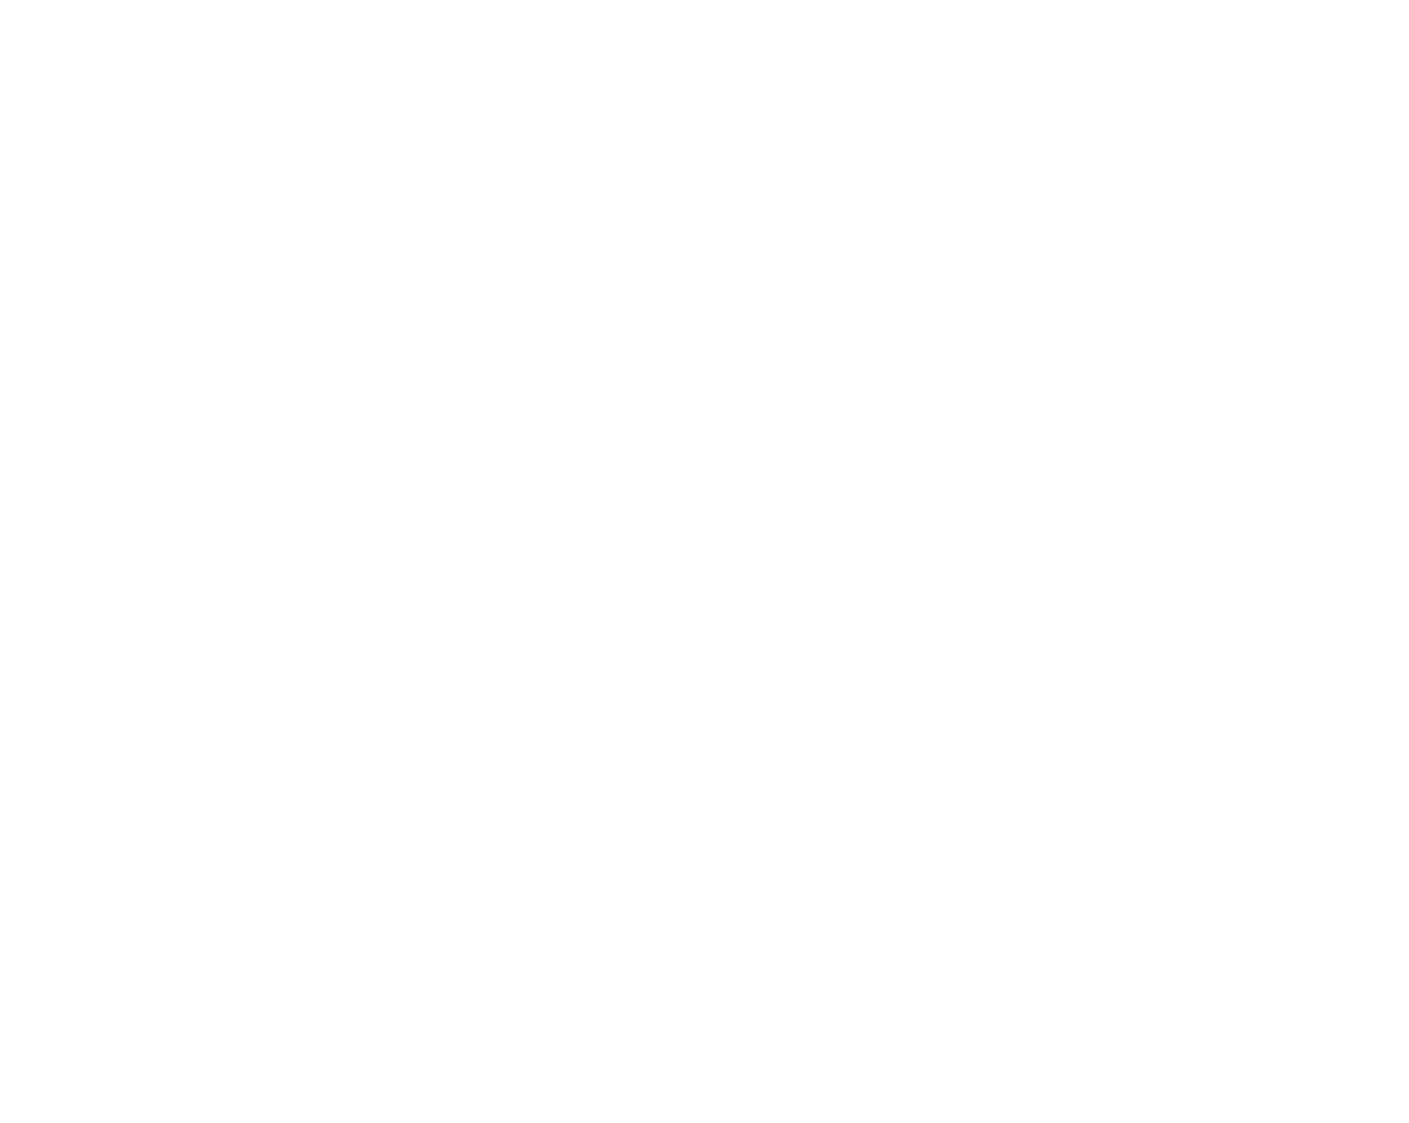

In [26]:
# Visualizing trained decision tree model
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = dt_clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = dt_clf.classes_,
                   filled = True)

fig

# Saving Decision Tree
# fig.savefig("mobile_dt.svg", bbox_inches = 'tight')

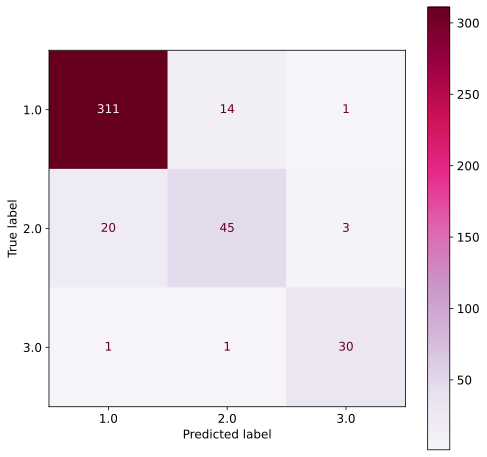

In [11]:
# Predictions on test set
y_pred = dt_clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt_clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax)
fig.savefig("fhc_dt_cm.svg", bbox_inches = 'tight')

In [12]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('fhc_dt_cr.csv') 

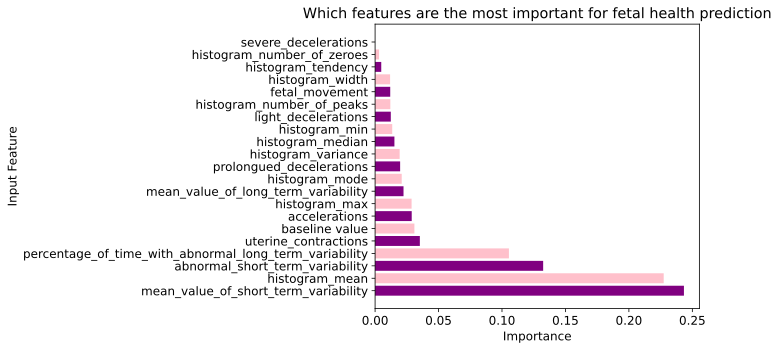

In [13]:
# Storing importance values from the trained model
importance = dt_clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health prediction') 
plt.tight_layout()
plt.savefig("fhc_dt_fi.svg")

In [14]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
rf_clf = RandomForestClassifier()

# Fitting model on training data
rf_clf.fit(train_X, train_y)

RandomForestClassifier()

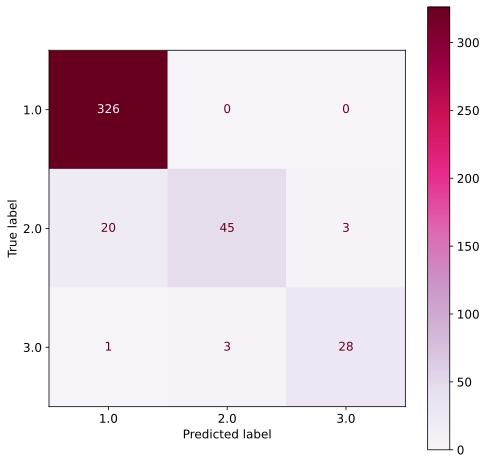

In [15]:
# Predictions on test set
y_pred = rf_clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (8, 8))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);
fig.savefig("fhc_rf_cm.svg", bbox_inches = 'tight')

**Choosing Colormaps in Matplotlib**: [**Check this link**](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

In [16]:
# Generating Classification Report
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df

# Save the report as a CSV File
report_df.to_csv('fhc_rf_cr.csv') 

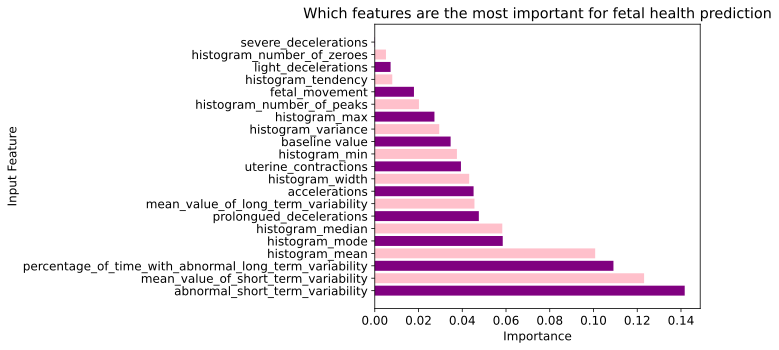

In [17]:
# Storing importance values from the trained model
importance = rf_clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for fetal health prediction') 
plt.tight_layout()
plt.savefig("fhc_rf_fi.svg");

### Save your prediction model and load it later to make predictions

**Using Pickle**

 <img src="https://d33wubrfki0l68.cloudfront.net/0f66116c250285870171e38f309161bafc25f06b/dbd4c/assets/images/posts/pickled-cabbage.jpg" width="350" style="float: center"/>

**Pickle** is a useful Python tool that allows you to save your ML models, to minimise lengthy re-training and allow you to share, commit, and re-load pre-trained machine learning models.

In [18]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('dt_fhc.pickle', 'wb') 

# Write DT model to the file
pickle.dump(dt_clf, dt_pickle) 

# Close the file
dt_pickle.close() 

In [19]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('rf_fhc.pickle', 'wb') 

# Write DT model to the file
pickle.dump(rf_clf, rf_pickle) 

# Close the file
rf_pickle.close() 